# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import pandas as pd

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

sign_names = pd.read_csv('signnames.csv')['SignName']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import numpy as np
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

## Visualize Data

View a sample from the dataset.

2


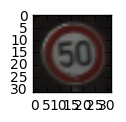

In [3]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

<Container object of 43 artists>

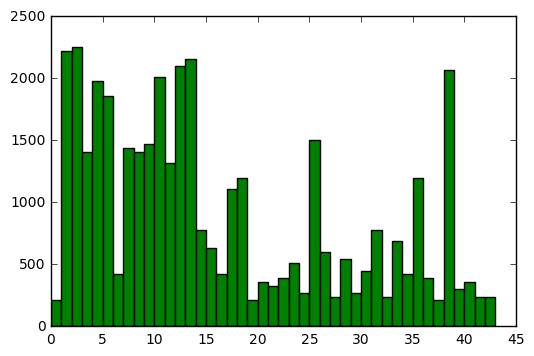

In [4]:
traffic_sign_frequency = {}
for n in y_train:
    if n not in traffic_sign_frequency:
        traffic_sign_frequency[n] = 1
    else:
        traffic_sign_frequency[n] += 1

plt.bar(traffic_sign_frequency.keys(), traffic_sign_frequency.values(), 1, color='g')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

## Preprocess Data

1. Shuffle the training data.
2. Normalize the features using Min-Max scaling between -0.5 and 0.5 

In [6]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

def normalize_features(features):
    return (features - features.mean()) / (np.max(features) - np.min(features))

X_train = normalize_features(X_train)
X_test = normalize_features(X_test)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

The training set data might be ordered or organized.  I shuffled the order of training data to disrupt the structure of the data.  The feature values normalized to have zero mean and equal variance.  This transformation makes it easier for the model to find a good solution,   The model's accuracy improve.  It also did helped with classifying my sample images.  

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [8]:
from sklearn.cross_validation import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=0)

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

/Users/johnnylee/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



Image Shape: (32, 32, 3)

Training Set:   31367 samples
Validation Set: 7842 samples
Test Set:       12630 samples


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The data given is already divided into a training set and a testing set.  However, there was not a validation set.  I set aside 20% of the training set to be used as the validation data set.  I will not look at this set of data until I finishing my model.   

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed. 

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

In [10]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 128

In [11]:
from tensorflow.contrib.layers import flatten

# Hyperparameters
mu = 0
sigma = 0.1

def weight_variable(shape):
  initial = tf.truncated_normal(shape, mean=mu, stddev=sigma)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W, strides=1):
  return tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')

def maxpool2d(x, k=2):
  return tf.nn.max_pool(x, ksize=[1, k, k, 1],
                        strides=[1, k, k, 1], padding='VALID')

def LeNet(x):    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    
    conv1_W = weight_variable([5, 5, 3, 6])
    conv1_b = bias_variable([6])
    conv1 = conv2d(x, conv1_W) + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d(conv1)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = weight_variable([5, 5, 6, 16])
    conv2_b = bias_variable([16])
    conv2 = conv2d(conv1, conv2_W) + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d(conv2)

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = weight_variable([400, 120])
    fc1_b = bias_variable([120])
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Solution: Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = weight_variable([120, 84])
    fc2_b  = bias_variable([84])
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Solution: Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = weight_variable([84, n_classes])
    fc3_b  = bias_variable([n_classes])
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits



## Features and Labels
Train LeNet to classify traffic sign data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [13]:
rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
trainable_variables   = tf.trainable_variables() 
l2_loss = tf.add_n([tf.nn.l2_loss(v) for v in trainable_variables])*0.001
loss_operation = tf.reduce_mean(cross_entropy+l2_loss)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** RELU activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** RELU activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** RELU activation function.

**Dropout.** Implemented dropout.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** RELU activation function.

**Dropout.** Implemented dropout.

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [15]:
### Train your model here.
### Feel free to use as many code cells as needed.

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [16]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.555

EPOCH 2 ...
Validation Accuracy = 0.797

EPOCH 3 ...
Validation Accuracy = 0.884

EPOCH 4 ...
Validation Accuracy = 0.906

EPOCH 5 ...
Validation Accuracy = 0.934

EPOCH 6 ...
Validation Accuracy = 0.946

EPOCH 7 ...
Validation Accuracy = 0.951

EPOCH 8 ...
Validation Accuracy = 0.959

EPOCH 9 ...
Validation Accuracy = 0.966

EPOCH 10 ...
Validation Accuracy = 0.965

EPOCH 11 ...
Validation Accuracy = 0.969

EPOCH 12 ...
Validation Accuracy = 0.971

EPOCH 13 ...
Validation Accuracy = 0.973

EPOCH 14 ...
Validation Accuracy = 0.977

EPOCH 15 ...
Validation Accuracy = 0.975

EPOCH 16 ...
Validation Accuracy = 0.979

EPOCH 17 ...
Validation Accuracy = 0.979

EPOCH 18 ...
Validation Accuracy = 0.978

EPOCH 19 ...
Validation Accuracy = 0.979

EPOCH 20 ...
Validation Accuracy = 0.981

EPOCH 21 ...
Validation Accuracy = 0.981

EPOCH 22 ...
Validation Accuracy = 0.978

EPOCH 23 ...
Validation Accuracy = 0.982

EPOCH 24 ...
Validation Accura

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

In [17]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.945


In [18]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_validation, y_validation)
    print("Validation Accuracy = {:.3f}".format(test_accuracy))

Validation Accuracy = 0.990



_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

The Optimizer used was the Adam Optimizer.  The batch size was for 128, and I used 100 epochs.  I used mu = 0 and sigma = 0.1 as the hyperparameters.  I changed the learning rate from 0.001 to 0.0001.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

It was a process of trial and error.  I started out by just applying the LeNet model from class to the problem.  I was getting an accuracy of 80% on the test set.  I started playing with the hyper parameters and learning rate.  I was able to improve the accuracy by using different learning rate.  

I tweaked the LeNet-5 archiecture from class with some improvements.  The bias uses a very small value instead of zero.  Google's own tensorflow tutorial recommends doing this to prevent dead neurons.  Dropout was added the fully connected layers to reduce overfitting.  Finally, I added L2 regulerzation to the objective function to penalty the model choosing very values for weights.  This helps overfitting as well.   

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

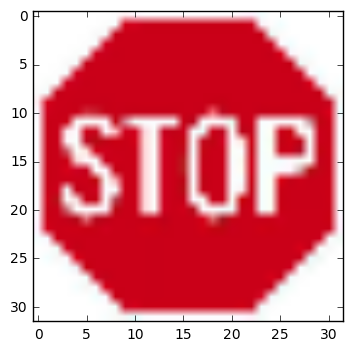

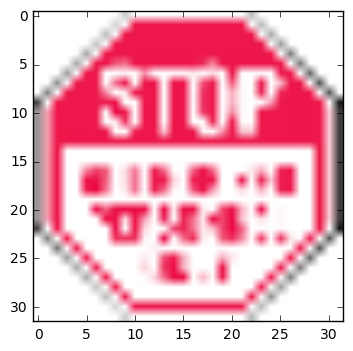

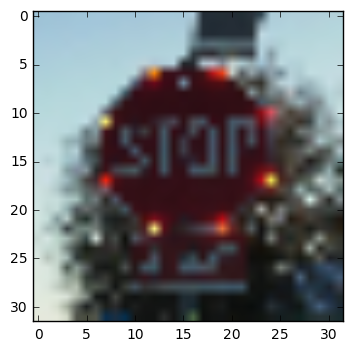

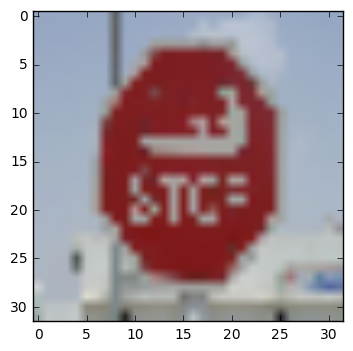

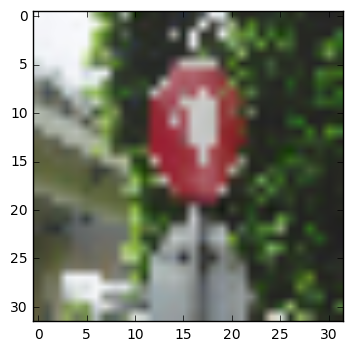

In [20]:
import os
import matplotlib.image as mpimg
from skimage import io
from skimage.transform import resize


directory_name = "test_images/"

X_sample = []

for index, image_path in enumerate(os.listdir(directory_name)):
    image = io.imread(directory_name + image_path)
    image = resize(image, (32, 32))
    plt.imshow(image)
    plt.show()
    X_sample.append(image)    

In [21]:
X_sample = np.asarray(X_sample)
X_sample = normalize_features(X_sample)
print(X_sample.shape)

(5, 32, 32, 3)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I decided to pick different five stop signs.  I think each sign should be more difficult to classify than the last one.  

1st image: this is a regular stop sign

2nd image: this is a regular stop sign.  The additional white space and text might trick the model.  

3rd image: this is a regular stop sign with lights around the light.  Hopefully the model will ignore the lights around the light.    

4th image: this is a stop sign with both arabic word and english word stop.  

5th image: this is a stop sign with the chinse word stop.  Does the model care the word stop is in Chinese instead of English?   

In [22]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [30]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(tf.argmax(logits, 1), feed_dict={x: X_sample, keep_prob: 1.0})
    for index, pred in enumerate(predictions):
        print("Sample image {} is predicted to be a {} sign".format(index + 1, sign_names[pred]))

Sample image 1 is predicted to be a Stop sign
Sample image 2 is predicted to be a Speed limit (30km/h) sign
Sample image 3 is predicted to be a Vehicles over 3.5 metric tons prohibited sign
Sample image 4 is predicted to be a Stop sign
Sample image 5 is predicted to be a End of speed limit (80km/h) sign


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model successfully 2 out of the 5 signs resulting in an accuracy of 40 percent.  The performance is very disappointing considering the model achieved an accuracy of 94.5% in the test set and 99% in the validation set.  The images I downloaded were much larger than 32 x 32.  They became very blurry after resizing them to fit the model.  The 5th sign had the chinese character for stop, but you can clearly see the word has been blurred out. 

In [28]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

In [29]:
init_op = tf.initialize_all_variables()
prediction = tf.nn.softmax(logits)
topFive=tf.nn.top_k(prediction, k=5, sorted=True, name=None)
top_k_feed_dict = {x: X_sample, keep_prob: 1.0}

# Run the tf.nn.top_k operation in the session
with tf.Session() as session:
    # Run the init operation.
    session.run(init_op)
    top_k_probabilities_per_image = session.run(topFive, feed_dict=top_k_feed_dict)
    values = top_k_probabilities_per_image.values
    indices = top_k_probabilities_per_image.indices

In [41]:
print(values)
print(indices)

[[ 0.0618477   0.05858985  0.03869143  0.03517774  0.03271772]
 [ 0.06792215  0.06443639  0.04099318  0.04095637  0.03958806]
 [ 0.04619994  0.04046978  0.03349204  0.031478    0.03128911]
 [ 0.04187635  0.04111728  0.03588605  0.03077948  0.03010279]
 [ 0.04459677  0.03996657  0.03099483  0.03000832  0.02996287]]
[[ 3 27  0 15  9]
 [ 3 27 15 39  0]
 [ 3 27 15  7  0]
 [ 3 27 15 32  0]
 [ 3 27 15 32  8]]


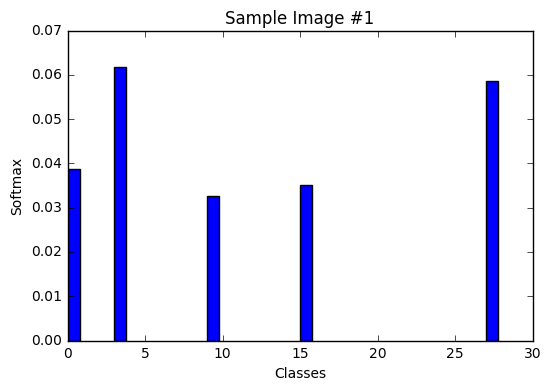

Sample image 1 is predicted to be a Speed limit (60km/h) sign with probability of 0.062
Sample image 1 is predicted to be a Pedestrians sign with probability of 0.059
Sample image 1 is predicted to be a Speed limit (20km/h) sign with probability of 0.039
Sample image 1 is predicted to be a No vehicles sign with probability of 0.035
Sample image 1 is predicted to be a No passing sign with probability of 0.033




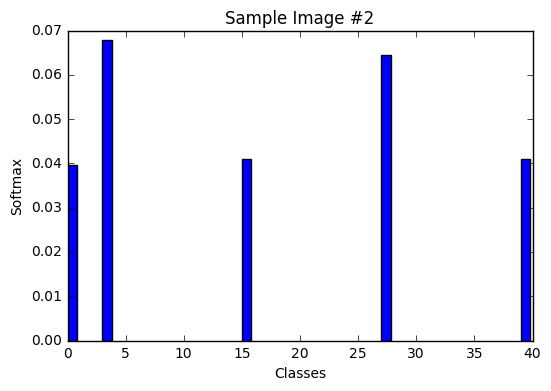

Sample image 2 is predicted to be a Speed limit (60km/h) sign with probability of 0.068
Sample image 2 is predicted to be a Pedestrians sign with probability of 0.064
Sample image 2 is predicted to be a No vehicles sign with probability of 0.041
Sample image 2 is predicted to be a Keep left sign with probability of 0.041
Sample image 2 is predicted to be a Speed limit (20km/h) sign with probability of 0.040




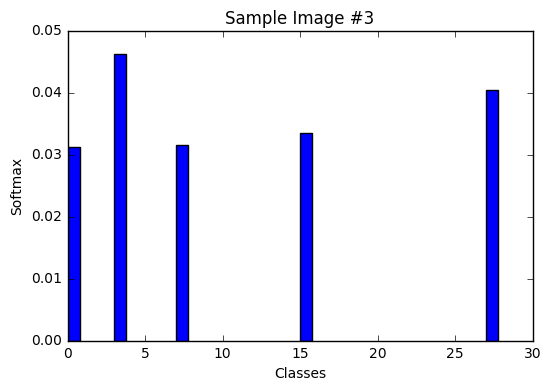

Sample image 3 is predicted to be a Speed limit (60km/h) sign with probability of 0.046
Sample image 3 is predicted to be a Pedestrians sign with probability of 0.040
Sample image 3 is predicted to be a No vehicles sign with probability of 0.033
Sample image 3 is predicted to be a Speed limit (100km/h) sign with probability of 0.031
Sample image 3 is predicted to be a Speed limit (20km/h) sign with probability of 0.031




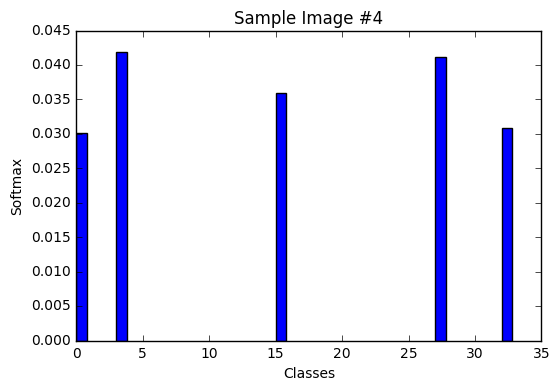

Sample image 4 is predicted to be a Speed limit (60km/h) sign with probability of 0.042
Sample image 4 is predicted to be a Pedestrians sign with probability of 0.041
Sample image 4 is predicted to be a No vehicles sign with probability of 0.036
Sample image 4 is predicted to be a End of all speed and passing limits sign with probability of 0.031
Sample image 4 is predicted to be a Speed limit (20km/h) sign with probability of 0.030




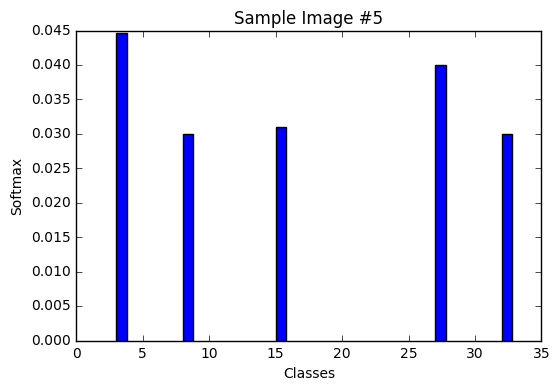

Sample image 5 is predicted to be a Speed limit (60km/h) sign with probability of 0.045
Sample image 5 is predicted to be a Pedestrians sign with probability of 0.040
Sample image 5 is predicted to be a No vehicles sign with probability of 0.031
Sample image 5 is predicted to be a End of all speed and passing limits sign with probability of 0.030
Sample image 5 is predicted to be a Speed limit (120km/h) sign with probability of 0.030




In [47]:
for i in range(values.shape[0]):
    plt.bar(indices[i], values[i])
    plt.xlabel('Classes')
    plt.ylabel('Softmax')
    plt.title("Sample Image #{}".format(i+1)) 
    plt.show()
    for j in range(values.shape[1]):
        prob = values[i, j]
        sign = sign_names[indices[i, j]]
        print("Sample image {} is predicted to be a {} sign with probability of {:.3f}".format(i + 1, sign, prob))
    print("\n")

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The model was more certain about its predictions for the first two image.  The top probability for the first two images was over 6 percent.  The top probability for the last three images was only over 4 percent.  This is somewhat expected so I made the images more and more difficult.  However, none of the five top predictions was a stop sign.  This means even with 5 guesses the model doesn't predict anything correctly.  The model performs worse when given five guesses instead of one.    

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.